# Load and Preprocess Data

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
file_path = 'StressLevels_Weather_Data_WithExams_Last.xlsx'
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date'])

# Target: Absolute stress level
y = df["Stress Level"]

# Feature Engineering
df['is_weekend'] = df['Date'].dt.dayofweek >= 5

# Select features
X = df[[
    'Temperature (°C)',
    'is_weekend',
    'Day of Week',
    'Time of Day',
    'Weather Condition'
]]

# Defining feature types
categorical_features = ['Day of Week', 'Time of Day', 'Weather Condition', 'is_weekend']
numerical_features = ['Temperature (°C)']

# Preprocessing data
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Model Setup

In [12]:
# Models
models = {
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor()
}

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and Evaluation


Random Forest Regressor
MSE: 4.33
R²: 0.21


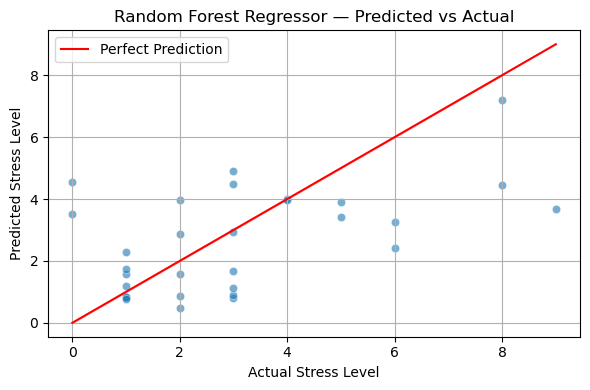


Support Vector Regressor
MSE: 4.13
R²: 0.25


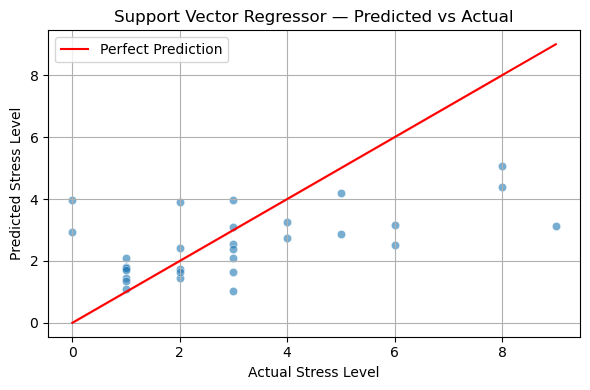


K-Nearest Neighbors Regressor
MSE: 4.81
R²: 0.12


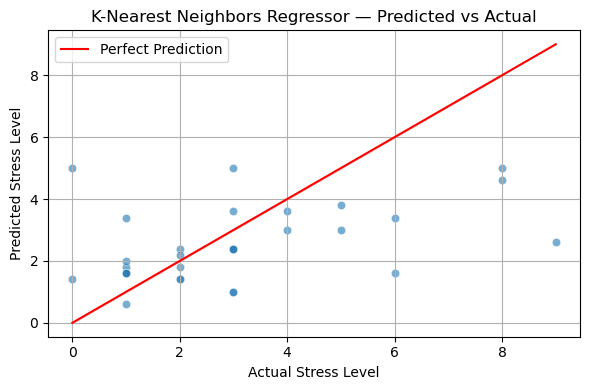

In [13]:
# Training, evaluating and plotting for each model
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.2f}")

    # Plotting actual vs predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Prediction')
    plt.xlabel("Actual Stress Level")
    plt.ylabel("Predicted Stress Level")
    plt.title(f"{name} — Predicted vs Actual")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


# Visualization: Model Performance Comparison

In [14]:
# Evaluation results
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Mean Squared Error (MSE)": round(mse, 2),
        "R² Score": round(r2, 2)
    })

# Comparison Table
results_df = pd.DataFrame(results)
print("\nEvaluation: Model Comparison")
display(results_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}]))



Evaluation: Model Comparison


,Model,Mean Squared Error (MSE),R² Score
0,Random Forest Regressor,4.330000,0.210000
1,Support Vector Regressor,4.130000,0.250000
2,K-Nearest Neighbors Regressor,4.810000,0.120000
